<div style="text-align: center;">
    <img src="../images/iofbanner.png" alt="Banner curso" style="width:80%">
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tema 3
## Actividad Asincrónica 03 – Flujos de Calor

Utiliza la ecuación completa de flujos de calor atmósfera-océano que se programó en clase para calcular los cambios de temperatura durante 24 hrs ocasionados por las siguientes combinaciones de condiciones:

| Condición | $Q_5(1-a)$ | $Q_b$ | $Q_e$ | $Q_c$ |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 240 | $n_c = 0$ | $W=15; T_a=40; H_R= 20%$ | $W=15; T_a=40; T_s=18$ |
| 2 | 240 | $n_c = 0.4$ | $W=8; T_a=36; H_R= 95%$ | $W=8; T_a=36; T_s=30$ |
| 3 | 100 | $n_c = 0.7$ | $W=8; T_a=36; H_R= 95%$ | $W=15; T_a=8; T_s=15$ |

Donde $n_c$ es la proporción del cielo cubierta por nubes, $W$ la velocidad del viento en $m/s$, $T_a$ la temperatura del aire en $^\circ C$, $H_R$ humedad relativa, $T_s$ temperatura de la superficie del mar en $^\circ C$.  

Escribe un informe breve con resumen, introducción, métodos, resultados-discusión y conclusiones, que no exceda 10 páginas ni sea menor a 4. Escribe tus resultados con base al tipo de ambiente que parece ser (desierto, zona tropical, etc) y el comportamiento de los procesos de transferencia de calor.

== Escribe tu informe aquí. ==

### Rutina para el cálculo de flujos de calor considerando todos los términos (ver clase 3.2 Influencias atmosféricas globales)


In [2]:
# Condiciones de radiación de alta frecuencia Qs(1-A)
A   = 0.3
Qs1 = 340
Qs  = Qs1 * (1-A)

In [3]:
# Calculo de radiación retrotransmitida Qb
es      = 0.985    # Valor de emisividad
sigma   = 5.67e-8  # constante de Stephan en Wm-2K4
Ts      = 30
ncc      = 0.5
Qb      = es * sigma * np.power((Ts+273), 4) * (1-0.6 * np.power(ncc, 2))

In [4]:
# Calculo de flujo de calor por evaporación
Lv      = 2.5e6     # Transferencia de calor latente
Ce      = 1.5e-3    # Numero de Dalton
rhoa    = 1.22      # kg/m^3 - densidad del aire
W       = 15        # m/s - velocidad del viento
Ta      = 36        # Temperatura del aire grados centígrados
HR      = 95        # Humedad relativa en proporción 0-1

In [5]:
# humedad específica de saturación  en kg/kg
qs = (3.8951 * np.exp(0.0631 * Ta)) / 1000 # Ta en Celsius

# humedad específica a partir de la humedad relativa y qs en kg/kg
qa = (HR * qs) / 100

In [6]:
# Cálculo de la evaporación 
Ev = rhoa * Ce * W * (qs-qa)
Qe = Lv * Ev

In [7]:
# Flujo de calor por conducción
Cs = 1.45e-3    # Numero de Stanton
ca = 1000       # Capacidad calorífica del aire
Qc = Cs * ca * rhoa * W * (Ts-Ta)

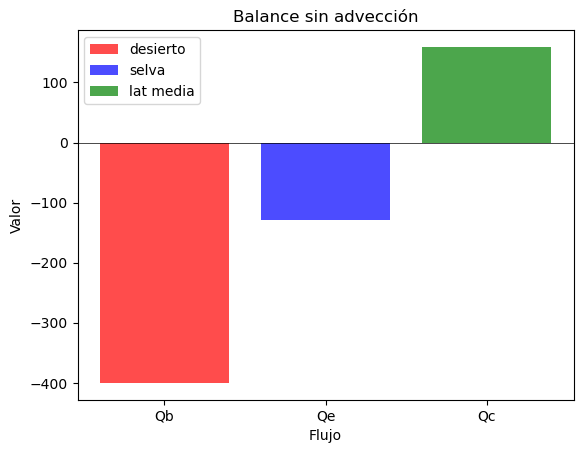

In [8]:
# Balance sin advección
Qi      = Qs - Qb - Qe - Qc

cp      = 4000   # calor específico (capacidad calorífica) del agua de mar
rhow    = 1025   # densidad del agua de mar
z       = 10     # profundidad

dTdt    = Qi / (rhow * cp * z)   # grados por segundo
dTdia   = dTdt * 86400;

# Gráfico de barras
y       = np.array([-Qb, -Qe, -Qc])
c       = pd.Categorical(['Qb','Qe','Qc'])

colores = ['red', 'blue', 'green']
labels = ['desierto', 'selva', 'lat media']
plt.bar(c, y, label=labels, color=colores, alpha=0.7)
plt.xlabel('Flujo')
plt.ylabel('Valor')
plt.title('Balance sin advección')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

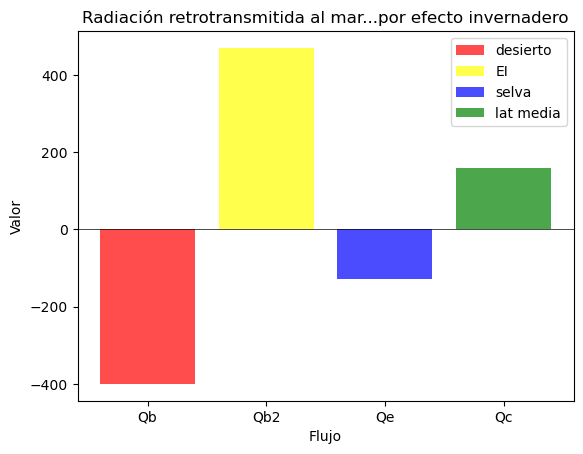

In [9]:
# Radiación retrotransmitida al mar...por efecto invernadero
sigma2  = 5.18e-13   # constante de Stephan en Wm-2K4
Qb2     = sigma2 * (1+0.17 * (np.power(ncc, 2))) * np.power((Ta+273), 6)

# Balance con invernadero Qb2
Qi2     = Qs - Qb + Qb2 - Qe - Qc

dT2     = Qi2 / (rhow * cp * z)
dTdia2  = dT2 * 86400;

y       = np.array([-Qb, Qb2, -Qe, -Qc])
c       = pd.Categorical(['Qb','Qb2','Qe','Qc']);

colores = ['red', 'yellow', 'blue', 'green']
labels = ['desierto', 'EI', 'selva', 'lat media']
plt.bar(c,y, label=labels, color=colores, alpha=0.7)
plt.xlabel('Flujo')
plt.ylabel('Valor')
plt.title('Radiación retrotransmitida al mar...por efecto invernadero')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()